In [17]:
import random as rd
import matplotlib.pyplot as plt
import numpy as np
import math

In [6]:
#적분 할 함수
def g(x):
  return 3*(x**2)

In [7]:
#uniform, beta(a,b), f(y) = 2*y 각 세 함수를 확률분포 함수로 이용하여 적분을 할 것이다.

def xi_1(x): #uniform
  return rd.uniform(0,1)

def xi_2(a,b): #beta(a,b)
  return np.random.beta(a,b)

def xi_3(x): #f(y) = 2*y
  return rd.uniform(0,1)**0.5

∫g(x)dx = 1/N * ∑g(xi)/f(xi)

In [8]:
#uniform에서 뽑은 샘플
sample1 = []
for i in range(100000):
  sample1.append(xi_1(i))

In [9]:
#beta(a,b)에서 뽑은 샘플
sample2 = []
for i in range(100000):
  sample2.append(xi_2(2,2))

In [10]:
#f(y) = 2*y에서 뽑은 샘플
sample3 = []
for i in range(100000):
  sample3.append(xi_3(i))

Text(0.5, 1.0, 'f(y) = 2*y')

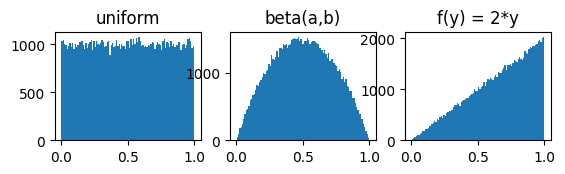

In [16]:
#각 샘플들의 형태(x:뽑힌 샘플의 위치, y:해당 위치에서 뽑힌 샘플의 수)

plt.subplot(331)
plt.hist(sample1,bins = 100)
plt.title('uniform')

plt.subplot(332)
plt.hist(sample2,bins = 100)
plt.title('beta(a,b)')

plt.subplot(333)
plt.hist(sample3,bins = 100)
plt.title('f(y) = 2*y')

In [18]:
def f_1(x):
  return 1

def f_2(x,a,b):
  return ( math.gamma(a+b)/(math.gamma(a) * math.gamma(b)) ) * x**(a-1) * (1-x)**(b-1)

def f_3(x):
  return 2*x

In [ ]:
s_1=0 #초기값
s_2=0
s_3=0

for i in range(100000): #샘플의 수는 100000개로 통일했다.
  s_1 += g(sample1[i]) /f_1(sample1[i])
  s_2 += g(sample2[i]) /f_2(sample2[i],2,2)
  s_3 += g(sample3[i]) /f_3(sample3[i])

result1=s_1 * (1/100000)
result2=s_2 * (1/100000)
result3=s_3 * (1/100000)

print(result1)
print(result2)
print(result3)

0.9980171794469875
1.0098292495836734
0.998865795155108


오차 확인

In [ ]:
#어떤 샘플을 사용했는지에 따라 오차가 다르다.

samples1, samples1_result = [],[]
samples2, samples2_result = [],[]
samples3, samples3_result = [],[]

for i in range(100): #분산을 보기 위해 100번 반복한다.
    sample1 = []
    sample2 = []
    sample3 = []

    for i in range(10000): #N=10000
      sample1.append(xi_1(i))
      sample2.append(xi_2(2,2))
      sample3.append(xi_3(i))

###############################################
    s_1=0 #초기값
    s_2=0
    s_3=0

    for i in range(10000):
      s_1 += g(sample1[i]) /f_1(sample1[i])
      s_2 += g(sample2[i]) /f_2(sample2[i],2,2)
      s_3 += g(sample3[i]) /f_3(sample3[i])

    result1=s_1 * (1/10000)
    result2=s_2 * (1/10000)
    result3=s_3 * (1/10000)

##################################################

    samples1.append(sample1)
    samples2.append(sample2)
    samples3.append(sample3)

    samples1_result.append(result1)
    samples2_result.append(result2)
    samples3_result.append(result3)

# 1.uniform

(0.95, 1.05)

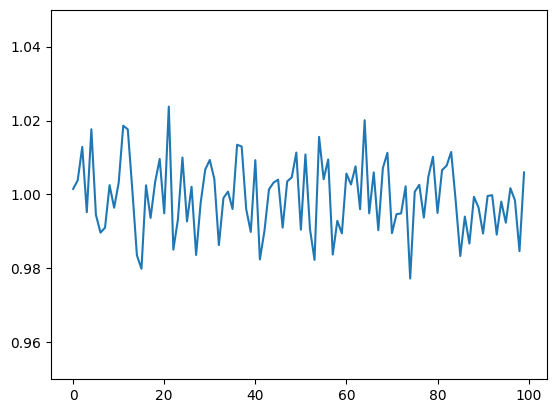

In [ ]:
plt.plot(samples1_result)
plt.ylim([0.95, 1.05])

In [ ]:
#평균
average1 = sum(samples1_result)/len(samples1_result)
print(average1)

0.999373741567886


In [ ]:
#표본분산
ssum1=0
for i in range(len(samples1_result)):
  ssum1 += (samples1_result[i]-average1)**2

sig_square_1 = 1/(len(samples1_result)-1) * ssum1
print(sig_square_1)

9.61041977675188e-05


# 2.beta(a,b)

(0.95, 1.05)

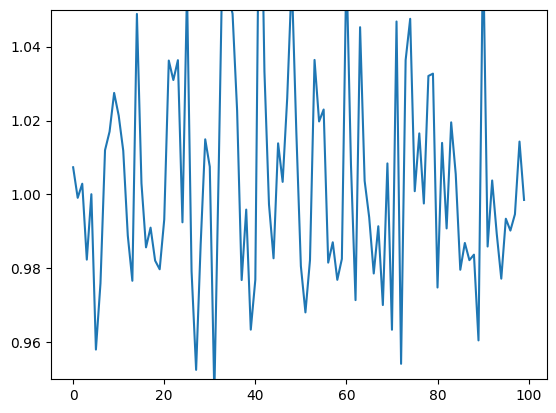

In [ ]:
plt.plot(samples2_result)
plt.ylim([0.95, 1.05])

In [ ]:
#평균
average2 = sum(samples2_result)/len(samples2_result)
print(average2)

1.003821862128884


In [ ]:
#표본분산
ssum2=0
for i in range(len(samples2_result)):
  ssum2 += (samples2_result[i]-average2)**2

sig_square_2 = 2/(len(samples2_result)-2) * ssum2
print(sig_square_2)

0.0017804109187755863


# 3.f(y) = 2*y

(0.95, 1.05)

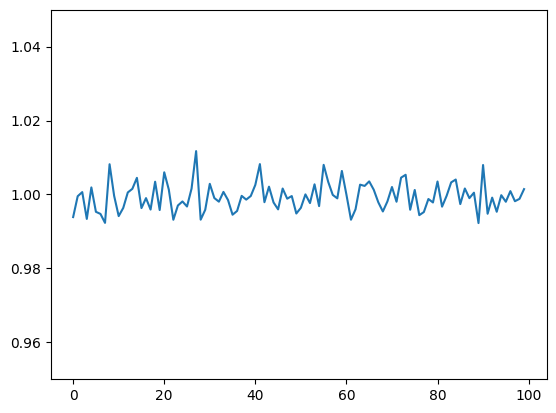

In [ ]:
plt.plot(samples3_result)
plt.ylim([0.95, 1.05])

In [ ]:
#평균
average3 = sum(samples3_result)/len(samples3_result)
print(average3)

0.9993479405644127


In [ ]:
#표본분산
ssum3=0
for i in range(len(samples3_result)):
  ssum3 += (samples3_result[i]-average3)**3

sig_square_3 = 3/(len(samples3_result)-3) * ssum3
print(sig_square_3)

1.0198812365997889e-07


In [ ]:
# f(y) = 2*y, uniform, beta(a,b) 순서대로 3*(x**2)에서 성능이 좋았다.
# 즉, 적분에 "어떤 샘플을 사용하는지"가 중요하다.